# Twitter Sentiment Analysis - 04 Modeling

The stock market is a focus for investors to maximize their potential profits and consequently, the interest shown from the technical and financial sides in stock market prediction is always on the rise. However, stock market prediction is a problem known for its challenging nature due to its dependency on diverse factors that affect the market, these factors are unpredictable and cannot be taken into consideration such as political variables, and social media effects such as twitter on the stock market.

Text classification can be applied to many different problems, including gauging the public opinion on social media. Historically, it is studied as news articles classification into a pre-determined set of classes, and based on the summary or the title or even the whole body of the article the machine learning models determine if the news article is about economy, sports, real state, and so on. It can also be used for classifying a company's documents into categories that will be analyzed only by the corresponding department. Finally, it can direct, for example, quantify public opinions by classifying the query of a ticker, allowing to gauge public sentiments and lead to accurate price prediction.

**Link(s) to previous notebook(s)**: \
00_Historical_Data_2014: https://github.com/parisvu07/Springboard_Data_Science/tree/main/Capstone_2_Twitter_Sentiment_Analysis \
01_Data_Wrangling:
https://github.com/parisvu07/Springboard_Data_Science/blob/main/Capstone_2_Twitter_Sentiment_Analysis/01_Data_Wrangling.ipynb \
02_Exploratory_Data_Analysis: https://github.com/parisvu07/Springboard_Data_Science/blob/main/Capstone_2_Twitter_Sentiment_Analysis/02_Exploratory_Data_Analysis.ipynb \
03_Preprocessing_and_Training_Data: https://github.com/parisvu07/Springboard_Data_Science/blob/main/Capstone_2_Twitter_Sentiment_Analysis/03_Preprocessing_and_Training_Data.ipynb

Quick fix for "Unable to render rich display": copy and paste the notebook link to https://nbviewer.org

## 4.1 Importing

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing stock data from notebook "02_Exploratory_Data_Analysis"
eda_stock_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/02_stock_data.csv', encoding='latin-1')
eda_stock_data = eda_stock_data.set_index('Dates')
eda_stock_data = eda_stock_data.drop('Time', axis=1)
eda_stock_data.head()

,Open,High,Low,Adj Close,Volume,%_change_Open,%_change_High,%_change_Low,%_change_Close,%_change_Volume
Dates,,,,,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,71250400,NaN,NaN,NaN,NaN,NaN
2022-12-02,145.960007,148.000000,145.649994,147.809998,65447400,-1.518116,-0.757731,-0.654803,-0.337132,-8.144516
2022-12-05,147.770004,150.919998,145.770004,146.630005,68826400,1.240064,1.972972,0.082396,-0.798317,5.162925
2022-12-06,147.070007,147.300003,141.919998,142.910004,64727200,-0.473707,-2.398619,-2.641151,-2.536999,-5.955854
2022-12-07,142.190002,143.369995,140.000000,140.940002,69721100,-3.318151,-2.668030,-1.352874,-1.378491,7.715304


In [3]:
#Importing tweet data from previous notebook "03_Preprocessing_and_Training_Data"
trading_hours_tweets = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/03_tweets_data.csv', lineterminator='\n')
trading_hours_tweets.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis,Sentiment,...,mention_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,clean_text,tokens,tweet_without_stopwords,tweet_lemmatized
0,2022-12-30,20:29:43,LlcBillionaire,0,Twitter Web App,10 New Yearâs food traditions around the wor...,0.454545,0.136364,Positive,1.0,...,0,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",6.133333,45.0,1.000000,0.022222,new yearâ food tradition around the world...,"['new', 'yearâ', 'food', 'tradition', 'around'...",new yearâ food tradition around world http c...,"['new', 'yearâ\x80\x99', 'food', 'tradition', ..."
1,2022-12-30,20:29:32,skitontop1,0,Twitter Web App,Entries &amp; exits Daily! \nDiscord link belo...,0.500000,0.300000,Positive,1.0,...,0,"{'! count': 1, '"" count': 0, '# count': 0, '$ ...",7.000000,19.0,0.973684,0.000000,entrie amp exit daily \ndi cord link belo...,"['entrie', 'amp', 'exit', 'daily', 'di', 'cord...",entrie amp exit daily di cord link belowð h...,"['entrie', 'amp', 'exit', 'daily', 'di', 'cord..."
2,2022-12-30,20:29:28,StockJobberOG,0,Twitter Web App,$AAPL $MSFT $SPY $TSLA $AMZN $BRK.B\n\nhttps:/...,0.000000,0.000000,Neutral,0.0,...,0,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",8.571429,7.0,1.000000,0.000000,aapl m ft py t la amzn brk b\n\nhttp t...,"['aapl', 'm', 'ft', 'py', 't', 'la', 'amzn', '...",aapl ft py la amzn brk b http co axzhktu,"['aapl', 'ft', 'py', 'la', 'amzn', 'brk', 'b',..."
3,2022-12-30,20:29:20,ItsJennyJ,0,Twitter for Android,@Apple I have an Apple ipod from 2012.\nI'd li...,0.000000,0.000000,Neutral,0.0,...,0,"{'! count': 0, '"" count': 0, '# count': 2, '$ ...",4.705882,6.8,0.794118,0.411765,i have an apple ipod from \ni d like to tar...,"['i', 'have', 'an', 'apple', 'ipod', 'from', '...",apple ipod like tart u ing apple id order tart...,"['apple', 'ipod', 'like', 'tart', 'u', 'ing', ..."
4,2022-12-30,20:29:11,LlcBillionaire,0,Twitter Web App,The biggest â and maybe the best â financi...,0.150000,0.500000,Positive,1.0,...,0,"{'! count': 0, '"" count': 0, '# count': 0, '$ ...",5.795918,24.5,0.938776,0.265306,the bigge t â and maybe the be t â financi...,"['the', 'bigge', 't', 'â', 'and', 'maybe', 'th...",bigge â maybe â financial olution hould u ...,"['bigge', 'â\x80\x94', 'maybe', 'â\x80\x94', '..."


### 4.1.1 Combining dataframes

First, let's take the average of any quantitative features for tweets data and group by date

In [4]:
combined_tweets = trading_hours_tweets.groupby('Dates').mean()
combined_tweets

,likes,Subjectivity,Polarity,Sentiment,char_count,word_count,sent_count,stopword_count,unique_word_count,htag_count,mention_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
Dates,,,,,,,,,,,,,,,
2022-12-17,1.596983,0.206672,0.061006,0.175862,124.908621,18.150862,1.532759,3.180172,17.259052,0.008621,0.003017,7.400849,12.959759,0.972285,0.126590
2022-12-18,1.493801,0.264743,0.105692,0.255526,149.453908,21.983288,1.693261,3.649057,20.955795,0.007008,0.006469,7.319960,14.772115,0.969702,0.137476
2022-12-19,3.197685,0.270225,0.100029,0.268064,148.786675,22.215202,1.680013,3.696591,21.015014,0.005317,0.003128,7.199670,15.536696,0.965331,0.149552
2022-12-20,2.744431,0.279508,0.107779,0.267610,158.768513,23.525286,1.742926,3.822396,22.344371,0.007526,0.003311,7.295932,16.233509,0.967147,0.147695
2022-12-21,2.053507,0.272517,0.117448,0.276300,156.415054,23.461306,1.739420,3.815296,22.122430,0.005139,0.002721,7.143177,16.190279,0.961665,0.145117
2022-12-22,1.612120,0.271617,0.113766,0.282603,154.507121,23.001955,1.720190,3.627758,21.757610,0.003351,0.001676,7.210586,15.909921,0.963305,0.142130
2022-12-23,3.619758,0.274485,0.121998,0.301957,151.534017,22.795899,1.699907,3.646163,21.507611,0.003728,0.004660,7.106530,15.888593,0.962002,0.143784
2022-12-24,4.824353,0.237647,0.088256,0.221833,126.921624,18.813856,1.630511,3.556333,17.876837,0.004899,0.001400,7.318954,12.894459,0.971496,0.147093
2022-12-25,2.044032,0.267823,0.122442,0.277454,158.561804,23.704509,1.592042,3.429708,22.809549,0.002122,0.001592,7.252467,17.165416,0.973555,0.131893


In [5]:
#Merging tweets with stock data. By default, merging will perform an inner join
stock_tweets_data = pd.merge(eda_stock_data, combined_tweets, left_index=True, right_index=True)
stock_tweets_data

,Open,High,Low,Adj Close,Volume,%_change_Open,%_change_High,%_change_Low,%_change_Close,%_change_Volume,...,word_count,sent_count,stopword_count,unique_word_count,htag_count,mention_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
Dates,,,,,,,,,,,,,,,,,,,,,
2022-12-19,135.110001,135.199997,131.320007,132.369995,79592600,-1.155902,-1.779874,-1.802130,-1.590959,-50.303359,...,22.215202,1.680013,3.696591,21.015014,0.005317,0.003128,7.199670,15.536696,0.965331,0.149552
2022-12-20,131.389999,133.250000,129.889999,132.300003,77432800,-2.753313,-1.442305,-1.088949,-0.052876,-2.713569,...,23.525286,1.742926,3.822396,22.344371,0.007526,0.003311,7.295932,16.233509,0.967147,0.147695
2022-12-21,132.979996,136.809998,132.750000,135.449997,85928000,1.210135,2.671668,2.201864,2.380948,10.971061,...,23.461306,1.739420,3.815296,22.122430,0.005139,0.002721,7.143177,16.190279,0.961665,0.145117
2022-12-22,134.350006,134.559998,130.300003,132.229996,77852100,1.030238,-1.644617,-1.845572,-2.377262,-9.398450,...,23.001955,1.720190,3.627758,21.757610,0.003351,0.001676,7.210586,15.909921,0.963305,0.142130
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900,-2.553039,-1.590368,-0.506526,-0.279812,-18.030599,...,22.795899,1.699907,3.646163,21.507611,0.003728,0.004660,7.106530,15.888593,0.962002,0.143784
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800,0.351365,-0.762721,-0.709656,-1.387837,8.137441,...,25.718081,1.753260,3.866667,24.379582,0.005412,0.002706,7.074926,17.847504,0.961730,0.144837
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400,-1.301573,-0.289175,-2.214107,-3.068521,23.809772,...,23.960809,1.754013,3.975818,22.627267,0.005212,0.000834,7.163769,16.615466,0.961521,0.155137
2022-12-29,127.989998,130.479996,127.730003,129.610001,75703700,-1.295597,-0.419754,1.477716,2.832434,-11.393823,...,21.069130,1.668905,4.321740,19.523455,0.005111,0.005024,9.785924,14.233505,0.954123,0.165234
2022-12-30,128.410004,129.949997,127.430000,129.929993,76960600,0.328155,-0.406192,-0.234873,0.246888,1.660289,...,20.520051,1.609075,3.980085,18.946076,0.005456,0.004774,10.169561,14.265523,0.954232,0.155501


In [6]:
#view all columns
stock_tweets_data.columns

Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', '%_change_Open',
       '%_change_High', '%_change_Low', '%_change_Close', '%_change_Volume',
       'likes', 'Subjectivity', 'Polarity', 'Sentiment', 'char_count',
       'word_count', 'sent_count', 'stopword_count', 'unique_word_count',
       'htag_count', 'mention_count', 'avg_wordlength', 'avg_sentlength',
       'unique_vs_words', 'stopwords_vs_words'],
      dtype='object')

### 4.1.2 Correlation

Understanding how the features in a dataset interact with each other is crucial when deciding which features to use in a model. There are many ways to construct a model that is effective and accurate. One of the fastest ways to strengthen a model is to identify and reduce the features in the dataset that are highly correlated. Correlated features will add noise and inaccuracy to a model, which in turn will make it harder to achieve the desired outcome.

Text(0.5, 1.0, 'Multi-Collinearity of Features')

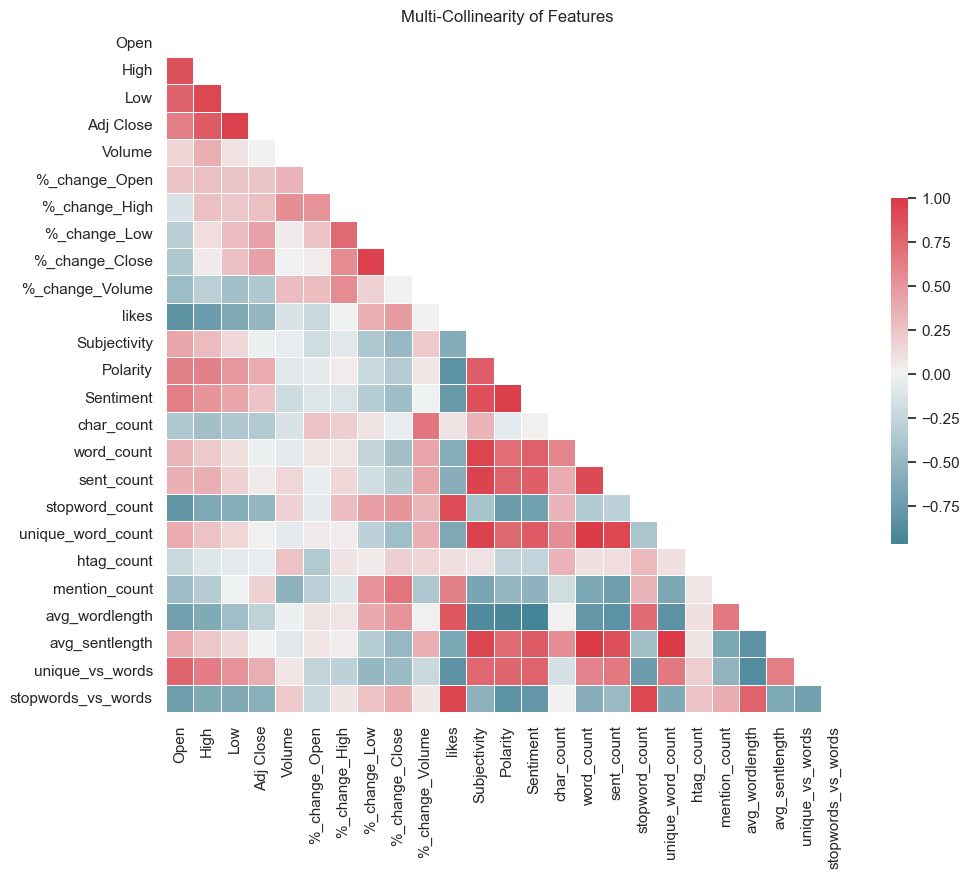

In [7]:
sns.set(style="white")
# Create a covariance matrix
corr = stock_tweets_data.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')